<a href="https://colab.research.google.com/github/Alafiade/Pretrained-LC2500-/blob/main/CANCERRRRRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms

In [2]:
pip install kaggle

In [3]:
import os
!mkdir -p ~/.kaggle
print('Created ~/.kaggle directory.')

Created ~/.kaggle directory.


In [4]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print('Kaggle API key configured.')

Kaggle API key configured.


In [5]:

!kaggle datasets download -d javaidahmadwani/lc25000

Dataset URL: https://www.kaggle.com/datasets/javaidahmadwani/lc25000
License(s): unknown
 95% 1.67G/1.76G [00:22<00:02, 37.5MB/s]
100% 1.76G/1.76G [00:23<00:00, 81.9MB/s]


In [6]:
!unzip lc25000.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn55.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn550.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn551.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn552.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn553.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn554.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn555.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn556.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn557.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn558.jpeg  
  inflating: lung_colon_image_set/Train and Validation Set/lung_n/lungn559.jpeg  
  inflating: lung_colon_image_set/Train and Vali

In [12]:
train = datasets.ImageFolder('/content/lung_colon_image_set/Train and Validation Set', transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
]))

test = datasets.ImageFolder('/content/lung_colon_image_set/Test Set', transform= transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
]))

In [13]:
len(train),(test)

(22501,
 Dataset ImageFolder
     Number of datapoints: 2499
     Root location: /content/lung_colon_image_set/Test Set
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [14]:
img_t,label = train[2]
type(img_t)

torch.Tensor

In [15]:
img_t.shape

torch.Size([3, 224, 224])

In [16]:
img_u, label = test[2]
type(img_u)

torch.Tensor

In [17]:
img_u.shape

torch.Size([3, 224, 224])

Text(0.5, 1.0, 'label: 0')

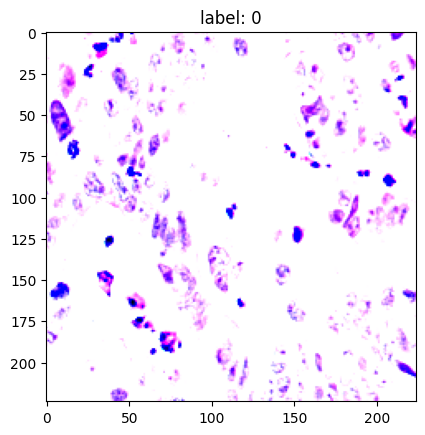

In [18]:
import matplotlib.pyplot as plt

img_t, label = train[2]
img_t = img_t.permute(1,2,0)

plt.imshow(img_t)
plt.title(f'label: {label}')


In [19]:
from torch.utils.data import DataLoader


train_loader = DataLoader(train, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)

In [20]:
import torchvision.models as models

model = models.resnet50(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]


In [21]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
import torch.nn as nn
model.fc= nn.Linear(in_features=2048, out_features= 5)

In [23]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
for param in model.parameters():
  param.requires_grad = False

In [25]:
for param in model.fc.parameters():
  param.requires_grad = True

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.0001,momentum=0.9)

In [27]:
device = torch.device('cuda' if torch.cuda.is_available()else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for epoch in range(15):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    print(f'Epoch [{epoch+1}/15], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

Epoch [1/15], Loss: 0.8997, Accuracy: 83.64%
Epoch [2/15], Loss: 0.4517, Accuracy: 93.80%
Epoch [3/15], Loss: 0.3366, Accuracy: 94.44%
Epoch [4/15], Loss: 0.2826, Accuracy: 94.68%
Epoch [5/15], Loss: 0.2515, Accuracy: 94.87%
Epoch [6/15], Loss: 0.2285, Accuracy: 95.02%
Epoch [7/15], Loss: 0.2103, Accuracy: 95.30%
Epoch [8/15], Loss: 0.1986, Accuracy: 95.42%
Epoch [9/15], Loss: 0.1894, Accuracy: 95.51%
Epoch [10/15], Loss: 0.1812, Accuracy: 95.48%
Epoch [11/15], Loss: 0.1717, Accuracy: 95.76%
Epoch [12/15], Loss: 0.1652, Accuracy: 95.94%
Epoch [13/15], Loss: 0.1606, Accuracy: 95.92%
Epoch [14/15], Loss: 0.1565, Accuracy: 95.96%


In [31]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)
print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 96.76%
